# Уравнение Буссинеска



### $$ u_{tt}-u_{xx}-3(u^2)_{xx}-u_{xxxx}=0\qquad(1) $$

### Уравнение Буссинеска представляет собой уравнение нелинейной струны и имеет различные физические положения. В частности, оно описывает распространение длинных волн на поверхности воды. 

### Подстановкой

###  $$u=2(\ln f)_{xx}\qquad\qquad\qquad\qquad\quad(2)$$

### уравнение (1) сведётся к билинейному дифференциальному уравнению

###  $$(D_t^2-D_x^2-D_x^4)f\bullet f=0.\qquad\qquad(3)$$

### Пользуясь техникой Хироты, найти одно- и двухсолитонное решения уравнения Буссинеска.

### ==============================================================
# Решение

### Приведем уравнение (3) в привычное обозначение. Для этого избавимся от операторов Хироты. 

###  Сначала упростим уравнение (4), после чего заменим $g = g(\xi,\tau)$ на $f = f(x,t)$

### $$(D_t^2-D_x^2-D_x^4)f\bullet g=0.\qquad\qquad(4)$$


In [1]:
from sympy import *
init_printing(use_unicode=True)

x, xi, tau, t = symbols('x xi tau t')
d_t = Symbol('\partial_t')
d_x = Symbol('\partial_x')
d_tau = Symbol(r'\partial_\tau')
d_xi = Symbol(r'\partial_\xi')
f, g = symbols('f g', cls = Function)
D_t, D_x = symbols('D_t D_x', cls = Function)

fg = f(x, t)*g(xi, tau)

# Операторы Хироты
D_t = d_t - d_tau
D_x = d_x - d_xi

In [2]:
Eq(Symbol('D_t^{2}fg'), expand(D_t*D_t)*f(x, t)*g(xi, tau))

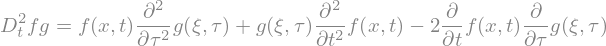

In [3]:
s1 = fg.diff(t, t) - 2*fg.diff(t, tau) + fg.diff(tau, tau)
Eq(Symbol('D_t^{2}fg'), s1)

In [4]:
Eq(Symbol('D_x^{2}fg'), expand(D_x*D_x)*f(x, t)*g(xi, tau))

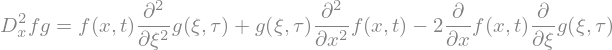

In [5]:
s2 = fg.diff(x, x) - 2*fg.diff(x, xi) + fg.diff(xi, xi)
Eq(Symbol('D_x^{2}fg'), s2)

In [6]:
Eq(Symbol('D_x^{4}fg'), expand((D_x**4))*f(x, t)*g(xi, tau))

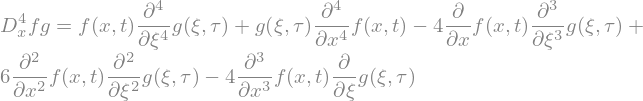

In [7]:
s3 = fg.diff(xi,xi,xi,xi)-4*fg.diff(xi,xi,xi,x)+6*fg.diff(xi,xi,x,x)-4*fg.diff(xi,x,x,x)+fg.diff(x,x,x,x)
Eq(Symbol('D_x^{4}fg'), s3)

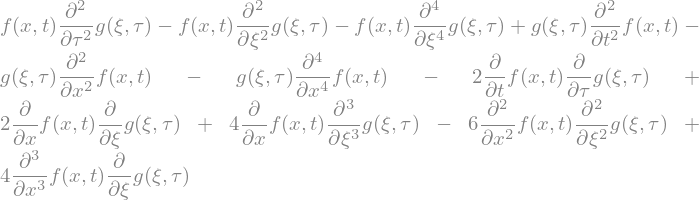

In [8]:
Dfg = s1 - s2 - s3
Dfg

## Создадим программную функцию, которая выполняет действие оператора $(D_t^2-D_x^2-D_x^4)$ на две функции.

In [9]:
def Hirota(f, g):
    Hir = f*g.diff(t,t) - f*g.diff(x,x) - f*g.diff(x,x,x,x) + g*f.diff(t,t) - g*f.diff(x,x) - g*f.diff(x,x,x,x)\
            - 2*f.diff(t)*g.diff(t) + 2*f.diff(x)*g.diff(x) + 4*f.diff(x)*g.diff(x,x,x) - 6*f.diff(x,x)*g.diff(x,x)\
            + 4*f.diff(x,x,x)*g.diff(x)
    return Hir

### В явном виде дифференциальное уравнение (3) имеет вид

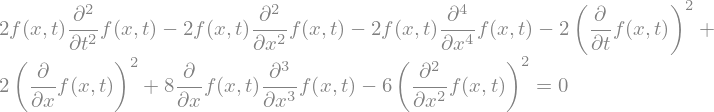

In [10]:
f = f(x, t)
Dff = Hirota(f, f)
Eq(Dff,0)

Замечание: операторы дифференцирования действуют только на стоящуюю перед ними функцию.

### Перепишем на более понятном языке.

### $$ff_{tt}-f_{xx}-ff_{xxxx}-f_t^2+f_x^2+4f_xf_{xxx}-3f_{xx}^2=0$$

### Разложим $f$ в ряд по малому параметру $\varepsilon$:
### $$f = 1 + \varepsilon f^{(1)} + \varepsilon^2f^{(2)} + \varepsilon^3f^{(3)} + \dots$$

In [11]:
eps = Symbol('varepsilon')
f1, f2, f3 = symbols('f^{(1)} f^{(2)} f^{(3)}')
f1_tt, f2_tt, f3_tt = symbols('f_{tt}^{(1)} f_{tt}^{(2)} f_{tt}^{(3)}')
f1_t, f2_t, f3_t = symbols('f_{t}^{(1)} f_{t}^{(2)} f_{t}^{(3)}')
f1_xxxx, f2_xxxx, f3_xxxx = symbols('f_{xxxx}^{(1)} f_{xxxx}^{(2)} f_{xxxx}^{(3)}')
f1_xxx, f2_xxx, f3_xxx = symbols('f_{xxx}^{(1)} f_{xxx}^{(2)} f_{xxx}^{(3)}')
f1_xx, f2_xx, f3_xx = symbols('f_{xx}^{(1)} f_{xx}^{(2)} f_{xx}^{(3)}')
f1_x, f2_x, f3_x = symbols('f_{x}^{(1)} f_{x}^{(2)} f_{x}^{(3)}')

f      = 1 + eps*f1 + eps**2*f2 + eps**3*f3
f_tt   = eps*f1_tt + eps**2*f2_tt + eps**3*f3_tt
f_t    = eps*f1_t + eps**2*f2_t + eps**3*f3_t
f_xxxx = eps*f1_xxxx + eps**2*f2_xxxx + eps**3*f3_xxxx
f_xxx  = eps*f1_xxx + eps**2*f2_xxx + eps**3*f3_xxx
f_xx   = eps*f1_xx + eps**2*f2_xx + eps**3*f3_xx
f_x    = eps*f1_x + eps**2*f2_x + eps**3*f3_x

H = f*f_tt-f_xx-f*f_xxxx-f_t**2+f_x**2+4*f_x*f_xxx-3*f_xx**2
H = collect(expand(H), eps)

In [12]:
H.coeff(eps, 1)   

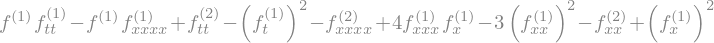

In [13]:
H.coeff(eps, 2)

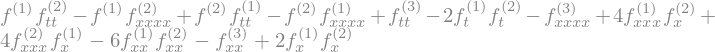

In [14]:
H.coeff(eps, 3)

### Приравнивая коэффициенты при одинаковых степенях $\varepsilon$, получим бесконечную систему линейных уравнений:

### $\varepsilon:\qquad f_{tt}^{(1)} - f_{xxxx}^{(1)} - f_{xx}^{(1)}=0$

### $\varepsilon^{2}:\qquad f_{tt}^{(2)} - f_{xxxx}^{(2)} - f_{xx}^{(2)} = -f^{(1)} f_{tt}^{(1)} + f^{(1)} f_{xxxx}^{(1)} + \left(f_{t}^{(1)}\right)^{2} - 4 f_{xxx}^{(1)} f_{x}^{(1)} + 3 \left(f_{xx}^{(1)}\right)^{2} - \left(f_{x}^{(1)}\right)^{2} = -\frac{1}{2}(D_t^2-D_x^2-D_x^4)f^{(1)}f^{(1)}$

### $\varepsilon^{3}:\qquad f_{tt}^{(3)} - f_{xxxx}^{(3)} - f_{xx}^{(3)}= -f^{(1)} f_{tt}^{(2)} + f^{(1)} f_{xxxx}^{(2)} - f^{(2)} f_{tt}^{(1)} + f^{(2)} f_{xxxx}^{(1)} + 2 f_{t}^{(1)} f_{t}^{(2)} - 4 f_{xxx}^{(1)} f_{x}^{(2)} - 4 f_{xxx}^{(2)} f_{x}^{(1)} + 6 f_{xx}^{(1)} f_{xx}^{(2)} - 2 f_{x}^{(1)} f_{x}^{(2)} =-\frac{1}{2}(D_t^2-D_x^2-D_x^4)f^{(1)}f^{(2)}$

### $\varepsilon^{4}:\qquad$

### $\varepsilon^{5}:\qquad$

### $\dots\dots\dots\dots$

## =====================================================
## Рассмотрим вначале односолитонное решение уравнения Буссинеска.

### В этом случае $f^{(1)}$ предствим в виде $f^{(1)} = e^{\theta} = e^{ax-bt+\delta}$

In [15]:
theta, delta = symbols('\\theta \delta')
a, b = var('a b', positive = True)

# Подставляем в первое уравнение системы и решаем ДУ
f1 = exp(a*x-b*t+delta)

eq = Eq(f1.diff(t,t) - f1.diff(x, x, x, x) - f1.diff(x, x), 0)
eq.simplify()

In [16]:
b_ = solve(eq, b)[0]
Eq(b, b_)

In [17]:
f1 = f1.subs(b,b_)
Eq(Symbol('f^{(1)}'), f1)

### $$f^{(1)}=e^{\delta - a t \sqrt{a^{2} + 1} + a x}$$

### Подставляя во второе уравнение системы, увидим действие операторов Хироты на $e^{\theta}\bullet e^{\theta} $, что приведет к обнулению. Поэтому 
### $$f^{(2)}=0$$

### $$f = 1+\varepsilon f^{(1)}=|\varepsilon=1| =1+e^{\theta}$$
### $$\theta = \delta - a t \sqrt{a^{2} + 1} + a x$$

In [18]:
f = 1 + exp(a*x-b*t+delta)
Eq(Symbol('f'),f)

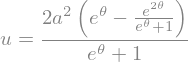

In [19]:
u = 2*(ln(f)).diff(x,x).subs([(a*x-b*t+delta, theta), (2*a*x-2*b*t+2*delta, 2*theta)])
Eq(Symbol('u'), u)

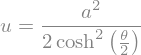

In [20]:
Eq(Symbol('u'), u.simplify())

### Таким образом односолитонное решение уравнения Буссинеска имеет вид

### $$u = \frac {a^2}{2 \cosh^2 \frac{1}{2}\left({ax - a\sqrt{a^2+1}+\delta} \right)}$$

## ===========================================
### Теперь найдём двухсолитонное решение уравнения Буссинеска. В этом случае $f^{(1)}$ предствим в виде

### $$f^{(1)} = e^{\theta_1}+e^{\theta_2} $$

### $$\theta_i= a_ix-b_it+\delta_i, \qquad i = 1, 2$$

In [21]:
theta_1, theta_2, delta_1, delta_2 = symbols('\\theta_1 \\theta_2 \delta_1 \delta_2')
a1, b1, a2, b2 = symbols('a_1 b_1 a_2 b_2', positive = True)

# Подставляем в первое уравнение системы и решаем ДУ
f1_1 = exp(a1*x-b1*t+delta_1)
f1_2 = exp(a2*x-b2*t+delta_2)

eq1_1 = f1_1.diff(t,t) - f1_1.diff(x, x, x, x) - f1_1.diff(x, x)
eq1_2 = f1_2.diff(t,t) - f1_2.diff(x, x, x, x) - f1_2.diff(x, x)
Eq(eq1_1.simplify() + eq1_2.simplify(), 0)

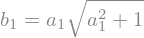

In [22]:
b1_ = solve(eq1_1, b1)[0]
Eq(b1, b1_)

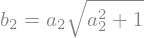

In [23]:
b2_ = solve(eq1_2, b2)[0]
Eq(b2, b2_)

In [24]:
f1 = f1_1 + f1_2
Eq(Symbol('f^{(1)}'), f1)

### Подставляем $f^{(1)}$ во второе уравнение системы. Оператор $D=D_t^2-D_x^2-D_x^4$ действует на 

### $$f\bullet g = f^{(1)}\bullet f^{(1)} $$

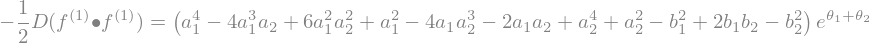

In [27]:
eq2 = -1/S(2)*Hirota(f1, f1)
eq2 = eq2.subs([(delta_1-b1*t+a1*x, theta_1), (delta_2-b2*t+a2*x, theta_2)])
eq2 = eq2.simplify()
Eq(Symbol('-\\frac{1}{2} D(f^{(1)} \\bullet f^{(1)})'), eq2)

### Чтобы решить ДУ:

### $$f_{tt}^{(2)} - f_{xxxx}^{(2)} - f_{xx}^{(2)} = \left(a_{1}^{4} - 4 a_{1}^{3} a_{2} + 6 a_{1}^{2} a_{2}^{2} + a_{1}^{2} - 4 a_{1} a_{2}^{3} - 2 a_{1} a_{2} + a_{2}^{4} + a_{2}^{2} - b_{1}^{2} + 2 b_{1} b_{2} - b_{2}^{2}\right) e^{\theta_1 + \theta_2},$$ 

### представим $f^{(2)} = Ae^{\theta_1 + \theta_2}$

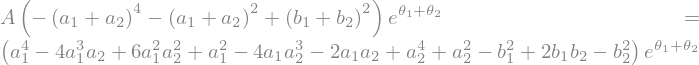

In [29]:
A, delta_12 = symbols('A \\delta_{12}')

f2 = A*exp(a1*x - b1*t + delta_1 + a2*x - b2*t + delta_2)

diffeq2 = (f2.diff(t,t) - f2.diff(x,x,x,x) - f2.diff(x,x)).simplify().\
            subs([(delta_1-b1*t+a1*x, theta_1), (delta_2-b2*t+a2*x, theta_2)])

Eq(diffeq2, eq2)

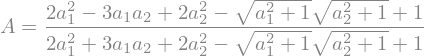

In [30]:
A = (solve(Eq(diffeq2, eq2), A)[0])
A = A.subs([(b1,b1_), (b2,b2_)]).simplify()
Eq(Symbol('A'), A)

### Подставляем $f^{(2)}$ и $f^{(1)}$ в третье уравнение системы. Оператор $D=D_t^2-D_x^2-D_x^4$ действует на $f\bullet g = f^{(1)}\bullet f^{(2)} $

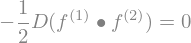

In [31]:
eq3 = -1/S(2)*Hirota(f1, f2)

eq3 = eq3.subs([(delta_1-b1*t+a1*x, theta_1), (delta_2-b2*t+a2*x, theta_2)])
eq3 = (eq3.subs([(b1, b1_), (b2, b2_)])).simplify()
Eq(Symbol('-\\frac{1}{2} D(f^{(1)} \\bullet f^{(2)})'), eq3)

### ДУ: $f_{tt}^{(3)} - f_{xxxx}^{(3)} - f_{xx}^{(3)} = 0$ имеет решение $f^{(3)} = 0$. Таким образом, ряд обрывается.

In [32]:
f = 1 + eps*f1 + eps**2*f2
Eq(Symbol('f'), f)

In [168]:
f = 1 + exp(a1*x-b1*t+delta_1) + exp(a2*x-b2*t+delta_2) + exp(a1*x-b1*t + a2*x-b2*t + delta_1 + delta_2 + delta_12)
Eq(Symbol('f'),f)

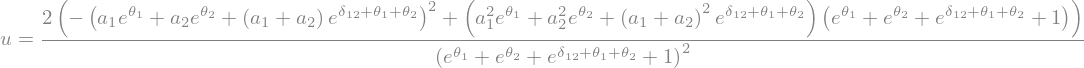

In [173]:
u = 2*(ln(f)).diff(x,x).subs([(a1*x-b1*t+delta_1, theta_1), (a2*x-b2*t+delta_2, theta_2)])
Eq(Symbol('u'), (u).simplify())

### Таким образом, в результате упрощений двухсолитонное решение уравнения Буссинеска имеет вид

### $$u = \left|a_1^2-a_2^2\right|\frac {a_1^2 \cosh \left(\theta_2+\frac{\delta_{12}}{2}\right) + a_2^2 \cosh \left(\theta_1+\frac{\delta_{12}}{2}\right) + \left|a_1^2-a_2^2\right|}{\left[\left|a_1-a_2\right|\cosh\left(\frac{\theta_1+\theta_2+\delta_{12}}{2}\right) + \left(a_1+a_2\right)\cosh\left(\frac{\theta_2-\theta_1}{2}\right)\right]^2}$$

### $$\delta_{12}=\ln(A), \qquad \varepsilon = 1$$

### $$A=\frac{2 a_{1}^{2} - 3 a_{1} a_{2} + 2 a_{2}^{2} - \sqrt{a_{1}^{2} + 1} \sqrt{a_{2}^{2} + 1} + 1}{2 a_{1}^{2} + 3 a_{1} a_{2} + 2 a_{2}^{2} - \sqrt{a_{1}^{2} + 1} \sqrt{a_{2}^{2} + 1} + 1}$$

![SSS](https://sun9-5.userapi.com/impg/CUuSR445PtNhYYbyyfaYZTitdlG-SEzVA74Aow/xKAP0FRkH8M.jpg?size=1280x610&quality=96&sign=8e85b9e4263e4dfd90dcbd907065c265)

## ===========================================
### Теперь найдём трёхсолитонное решение уравнения Буссинеска. В этом случае $f^{(1)}$ предствим в виде

### $$f^{(1)} = e^{\theta_1}+e^{\theta_2}+e^{\theta_3} $$

### $$\theta_i= a_ix-b_it+\delta_i, \qquad i = 1, 2, 3$$

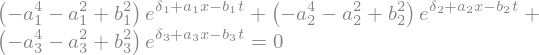

In [45]:
theta_3, delta_3 = symbols('\\theta_3 \delta_3')
a3, b3 = symbols('a_3 b_3', positive = True)

# Подставляем в первое уравнение системы и решаем ДУ
f1_1 = exp(a1*x-b1*t+delta_1)
f1_2 = exp(a2*x-b2*t+delta_2)
f1_3 = exp(a3*x-b3*t+delta_3)

eq1 = f1_1.diff(t,t) - f1_1.diff(x, x, x, x) - f1_1.diff(x, x)
eq2 = f1_2.diff(t,t) - f1_2.diff(x, x, x, x) - f1_2.diff(x, x)
eq3 = f1_3.diff(t,t) - f1_3.diff(x, x, x, x) - f1_3.diff(x, x)

Eq(eq1.simplify() + eq2.simplify() + eq3.simplify(), 0)

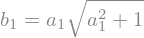

In [46]:
b1__ = solve(eq1, b1)[0]
Eq(b1, b1__)

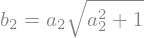

In [47]:
b2__ = solve(eq2, b2)[0]
Eq(b2, b2__)

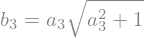

In [48]:
b3__ = solve(eq3, b3)[0]
Eq(b3, b3__)

In [50]:
f1 = f1_1 + f1_2 + f1_3
Eq(Symbol('f^{(1)}'), f1)

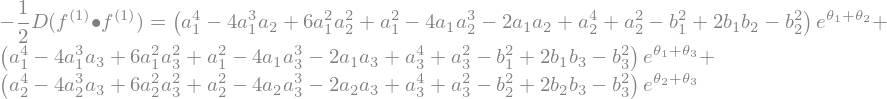

In [51]:
eq2 = -1/S(2) * Hirota(f1, f1)
eq2 = eq2.subs([(delta_1-b1*t+a1*x, theta_1), (delta_2-b2*t+a2*x, theta_2), (delta_3-b3*t+a3*x, theta_3)])
eq2 = expand(eq2.simplify())
e = exp
o1 = theta_1
o2 = theta_2
o3 = theta_3
eq2 = eq2.subs([(e(o1)*e(o2), e(o1+o2)), (e(o1)*e(o3), e(o1+o3)), (e(o2)*e(o3), e(o2+o3))])
eq2 = collect(eq2, [e(o1+o2), e(o1+o3), e(o2+o3)])
Eq(Symbol('-\\frac{1}{2} D(f^{(1)} \\bullet f^{(1)})'), eq2)

### Чтобы решить ДУ:

### $$f_{tt}^{(2)} - f_{xxxx}^{(2)} - f_{xx}^{(2)} = -\frac{1}{2} D(f^{(1)} \bullet f^{(1)}),$$ 

### представим $f^{(2)} = Ae^{\theta_1 + \theta_2} + Be^{\theta_1 + \theta_3} + Ce^{\theta_2 + \theta_3}$

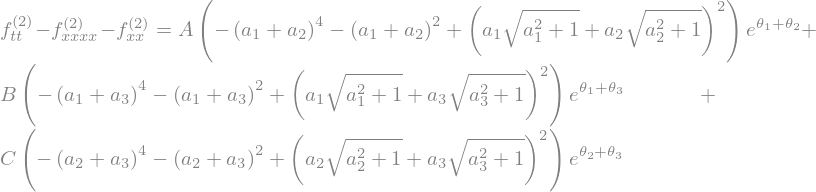

In [54]:
A, B, C = symbols('A B C')

f2_1 = A*exp(a1*x-b1*t+delta_1 + a2*x-b2*t+delta_2).subs([(b1, b1__), (b2, b2__)])
f2_2 = B*exp(a1*x-b1*t+delta_1 + a3*x-b3*t+delta_3).subs([(b1, b1__), (b3, b3__)])
f2_3 = C*exp(a2*x-b2*t+delta_2 + a3*x-b3*t+delta_3).subs([(b2, b2__), (b3, b3__)])

equation_1 = (f2_1.diff(t,t) - f2_1.diff(x,x,x,x) - f2_1.diff(x,x)).simplify().\
            subs([(delta_1-b1__*t+a1*x, theta_1), (delta_2-b2__*t+a2*x, theta_2)])
equation_2 = (f2_2.diff(t,t) - f2_2.diff(x,x,x,x) - f2_2.diff(x,x)).simplify().\
            subs([(delta_1-b1__*t+a1*x, theta_1), (delta_3-b3__*t+a3*x, theta_3)])
equation_3 = (f2_3.diff(t,t) - f2_3.diff(x,x,x,x) - f2_3.diff(x,x)).simplify().\
            subs([(delta_2-b2__*t+a2*x, theta_2), (delta_3-b3__*t+a3*x, theta_3)])

equation = equation_1 + equation_2 + equation_3
Eq(Symbol('f_{tt}^{(2)} - f_{xxxx}^{(2)} - f_{xx}^{(2)}'), equation)

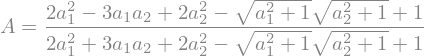

In [55]:
A = solve(Eq(equation_1, (-4*a1**3*a2+6*a1**2*a2**2-4*a1*a2**3+2*b1__*b2__-2*a1*a2)*e(o1+o2)), A)[0]
Eq(Symbol('A'), A)

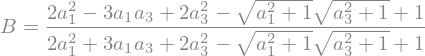

In [56]:
B = solve(Eq(equation_2, (-4*a1**3*a3+6*a1**2*a3**2-4*a1*a3**3+2*b1__*b3__-2*a1*a3)*e(o1+o3)), B)[0]
Eq(Symbol('B'), B)

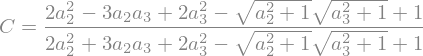

In [57]:
C = solve(Eq(equation_3, (-4*a2**3*a3+6*a2**2*a3**2-4*a2*a3**3+2*b2__*b3__-2*a2*a3)*e(o2+o3)), C)[0]
Eq(Symbol('C'), C)

### Подставляем $f^{(2)}$ и $f^{(1)}$ в третье уравнение системы. Оператор $D=D_t^2-D_x^2-D_x^4$ действует на $f\bullet g = f^{(1)}\bullet f^{(2)} $

In [140]:
Eq(Symbol('f^{(1)}'), f1)

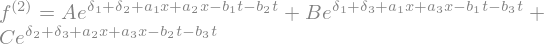

In [142]:
f2 = (f2_1 + f2_2 + f2_3).subs([(b1__, b1), (b2__, b2), (b3__, b3)])
Eq(Symbol('f^{(2)}'), f2)

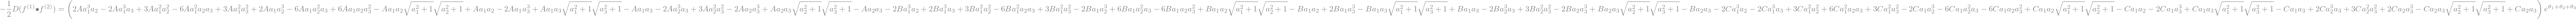

In [146]:
eq3 = -1/S(2)* Hirota(f1, f2)

eq3 = eq3.subs([(delta_1-b1*t+a1*x, theta_1), (delta_2-b2*t+a2*x, theta_2),\
                                (delta_3-b3*t+a3*x, theta_3)])

eq3 = eq3.subs([(b1, b1__), (b2, b2__), (b3, b3__)]).simplify(force = True)

Eq(Symbol('-\\frac{1}{2} D(f^{(1)} \\bullet f^{(2)})'), eq3)

### Чтобы решить ДУ:

### $$f_{tt}^{(3)} - f_{xxxx}^{(3)} - f_{xx}^{(3)} = -\frac{1}{2} D(f^{(1)} \bullet f^{(2)}),$$ 

### представим $f^{(3)} = De^{\theta_1 + \theta_2 + \theta_3}$

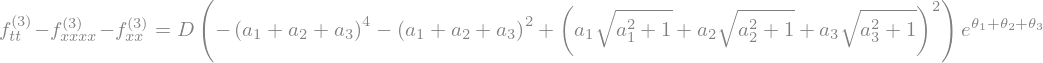

In [260]:
D = symbols('D')

f3 = D*exp(a1*x-b1*t+delta_1 + a2*x-b2*t+delta_2 + a3*x-b3*t+delta_3).subs([(b1, b1__), (b2, b2__), (b3, b3__)])

diffeq3 = (f3.diff(t,t) - f3.diff(x,x,x,x) - f3.diff(x,x)).simplify().\
            subs([(delta_1-b1__*t+a1*x, theta_1), (delta_2-b2__*t+a2*x, theta_2), (delta_3-b3__*t+a3*x, theta_3)])

Eq(Symbol('f_{tt}^{(3)} - f_{xxxx}^{(3)} - f_{xx}^{(3)}'), diffeq3)

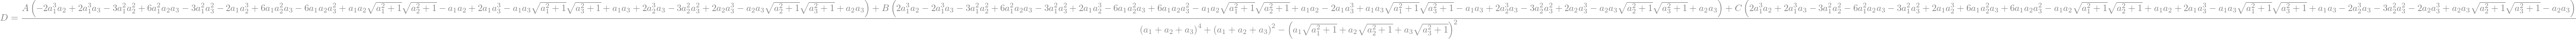

In [261]:
D = solve(Eq(diffeq3, eq3), D)[0].simplify()
D = collect(D, [Symbol('A'), Symbol('B'), Symbol('C')])
Eq(Symbol('D'), D)

In [153]:
f3 = f3.subs([(D, Symbol('D')), (b1__, b1), (b2__, b2), (b3__, b3)])
Eq(Symbol('f^{(3)}'), f3)

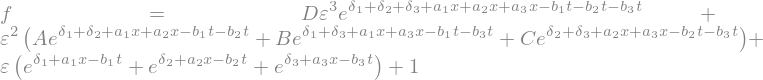

In [162]:
f = 1 + eps*f1 + eps**2*f2 + eps**3*f3
Eq(Symbol('f'), f)

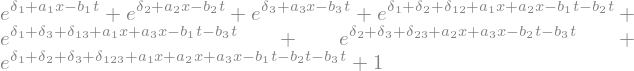

In [285]:
q1 = delta_1
q2 = delta_2
q3 = delta_3
q123, q12, q13, q23 = symbols('\delta_{123} \delta_{12} \delta_{13} \delta_{23}')

f = e(q1+q2+q3+a1*x+a2*x+a3*x-b1*t-b2*t-b3*t+q123) + e(q1+q2+a1*x+a2*x-b1*t-b2*t+q12) + e(q1+q3+a1*x+a3*x-b1*t-b3*t+q13)\
     + e(q2+q3+a2*x+a3*x-b2*t-b3*t+q23) + e(q1+a1*x-b1*t) + e(q2+a2*x-b2*t) + e(q3+a3*x-b3*t) + 1
f

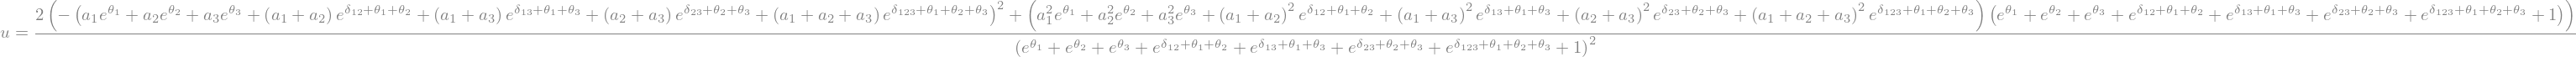

In [286]:
u = 2*(ln(f)).diff(x,x).subs([(a1*x-b1*t+q1, theta_1), (a2*x-b2*t+q2, theta_2), (a3*x-b3*t+q3, theta_3)])
u = u.simplify()
Eq(Symbol('u'), u)

![sss](https://sun9-46.userapi.com/impg/TpmXsCxlJirkIhqV_vN-zt4dUeXZZOXqb74HWw/AMsVrjmMRs4.jpg?size=1280x610&quality=96&sign=ff275b2f9fbc658708ddfd0d26612328)